In [1]:
import Keldysh; kd = Keldysh
import KeldyshED; ked = KeldyshED; op = KeldyshED.Operators;

using QInchworm.spline_gf: SplineInterpolatedGF

import PyPlot; const plt = PyPlot; plt.pygui(false); plt.svg(true);

┌ Info: Precompiling QInchworm [c1b6c5a0-2f71-4f50-a75d-692762eff855]
└ @ Base loading.jl:1423


In [17]:
β = 10.
μ = +0.2 # Chemical potential
ϵ = +0.1 # Bath energy level
V = -0.1 # Hybridization

# -- Discretization

ntau = 10
tmax = 1.

contour = kd.ImaginaryContour(β=β)
grid = kd.ImaginaryTimeGrid(contour, ntau)

# -- Exact Diagonalization

H = - μ * op.n("0") + ϵ * op.n("1") +
      V * op.c_dag("1") * op.c("0") + V * op.c_dag("0") * op.c("1")
soi = ked.Hilbert.SetOfIndices([["0"], ["1"]]);
ed = ked.EDCore(H, soi)

idx = ked.Hilbert.IndicesType(["0"])
g = ked.computegf(ed, grid, idx, idx);

g_int = SplineInterpolatedGF(g);

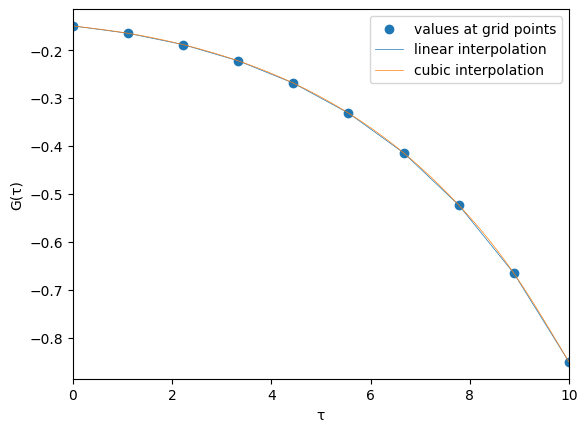

In [18]:
g_vals = [g(tau.bpoint, grid[1].bpoint) for tau in grid]
plt.scatter(kd.imagtimes(grid), imag(g_vals), label="values at grid points")

fine_grid = kd.ImaginaryTimeGrid(contour, 100)

g_vals_linear = [g(tau.bpoint, grid[1].bpoint) for tau in fine_grid]
plt.plot(kd.imagtimes(fine_grid), imag(g_vals_linear), lw=0.5, label="linear interpolation")

g_vals_cubic = [g_int(tau.bpoint, grid[1].bpoint) for tau in fine_grid]
plt.plot(kd.imagtimes(fine_grid), imag(g_vals_cubic), lw=0.5, label="cubic interpolation")

plt.xlim((0, β))
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.legend();